<h1><center><u> GRIP - The Sparks Foundation </u></center></h1>

## <center><u>Data Science and Business Analytics Internship</u></center>

### <center><u>Linear Regression with Python Scikit Learn - Prediction using Supervised ML</u></center>

### <center>Author: Lalitha Soumya Ayyagari</center>

<hr style = "border : 2px solid blue"> </hr>

### Task 1: Predict the percentage of a student based on the number of study hours.

<i>In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours thy studied. This is a simple Linear Regression task as it involves just two variables.</i>

<hr style = "border : 2px solid blue"> </hr>

### <u>Importing the required libraries</u>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

%matplotlib inline
print('Libraries have been imported successfully')

Libraries have been imported successfully


<hr style = "border : 2px solid blue"> </hr>

### <u>Reading the data from Online Source</u>

In [8]:
src = "http://bit.ly/w-data"
df = pd.read_csv(src)
print('Data has been imported succesfully')

Data has been imported succesfully


<hr style = "border : 2px solid blue"> </hr>

### <u>Data Exploration</u>

In [10]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [12]:
# checking for any missing values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [13]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [15]:
# checking the correlation between hours and 
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


<breakquote> <i>This shows higher correlation between hours and scores. </i></breakquote>

<hr style = "border : 2px solid blue"> </hr>

### <u>Data Visualisation</u>

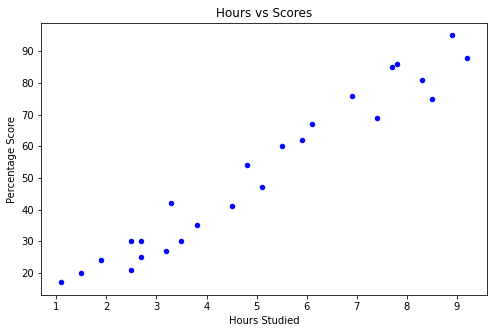

In [47]:
# Visualising with Scatter Plot

df.plot(kind = 'scatter', x='Hours', y='Scores', color='b', figsize=(8,5))
plt.title('Hours vs Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

<breakquote><i>By Visualisation of the given data set, we can conclude that this problem can be easily solved by using <b>Linear Regression</b>.</i></breakquote>

<hr style = "border : 2px solid blue"> </hr>

### <u>Training the Model</u>

<breakquote><i>We shall now use the <b>train_test_split</b> to split the data into Train and Test data.</i></breakquote>

In [25]:
x = np.asanyarray(df[['Hours']])
y = np.asanyarray(df['Scores'])

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=2)

regressor = LinearRegression()
regressor.fit(train_x, train_y)

print('Training Completed\n')
print('Coefficient: ', regressor.coef_)
print('Intercept: ', regressor.intercept_)


Training Completed

Coefficient:  [9.94061514]
Intercept:  1.5079104828268726


<hr style = "border : 2px solid blue"> </hr>

### <u>Plotting the Regression Line</u>

<breakquote><i>From the above Scatter Plot, there looks to be a correlation between the Hours Studied and Percentage Score. Thus, to confirm this correlation, let us now plot a <b>Regression Line</b> in the above Scatter Plot.</i></breakquote>

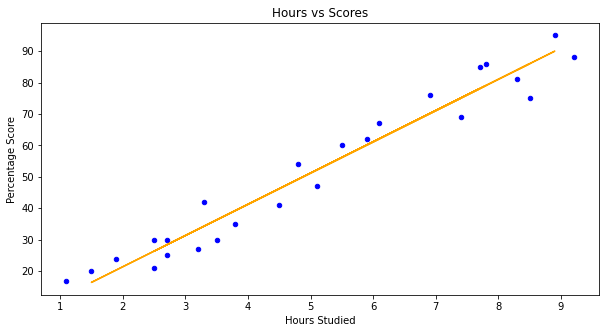

In [46]:
df.plot(kind = 'scatter', x='Hours', y='Scores', color='b', figsize=(10,5))
plt.plot(train_x, regressor.coef_[0]*train_x + regressor.intercept_, color = "orange")
plt.title('Hours vs Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

<breakquote><i>The <b>orange line</b> is the best fit for this data.</i></breakquote>

<hr style = "border : 2px solid blue"> </hr>

### <u>Predicting the Scores</u>

In [40]:
pred_y = regressor.predict(test_x)
pred = pd.DataFrame({'Hours' : [i[0] for i in test_x], 'Predicted Scores' : pred_y})
pred


,Hours,Predicted Scores
0,1.1,12.442587
1,2.5,26.359448
2,1.9,20.395079
3,9.2,92.961570
4,6.9,70.098155


<hr style = "border : 2px solid blue"> </hr>

### <u>Comparing Predicted Scores with Actual Scores<u>

In [52]:
comp = pd.DataFrame({'Actual Marks' :test_y, 'Predicted Scores' : pred_y})
comp



,Actual Marks,Predicted Scores
0,17,12.442587
1,21,26.359448
2,24,20.395079
3,88,92.961570
4,76,70.098155


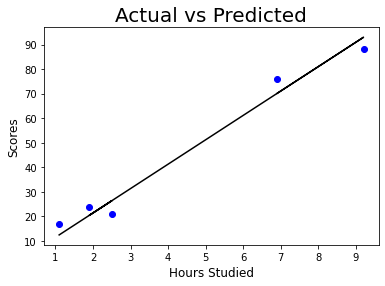

In [55]:
# Visualising the resultant data 

plt.scatter(x=test_x, y=test_y, color='blue')
plt.plot(test_x, pred_y, color='Black')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Scores', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

<hr style = "border : 2px solid blue"> </hr>

### <u>Evaluating the Model</u>

In [56]:
# Calculating the accuracy of the model

from sklearn.metrics import mean_absolute_error
print('Mean absolute error: ', mean_absolute_error(test_y, pred_y))

Mean absolute error:  4.877039354964484


<breakquote><i>Smaller value of Mean absolute error signifies that the chances of wrong forecasting of relevant results through the model are <b>very less</b>.</i></breakquote>

<hr style = "border : 2px solid blue"> </hr>

## Question: What will be the predicted score of a student if he/she studies for 9.25 hrs/day? 

In [59]:
hours = [9.25]
answer = regressor.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 93.459


<breakquote><b>
According to the regression model if a student studies for 9.25 hours a day he/she is likely to score 93.89 marks.</b></breakquote>